# **XOR 이해하기 with Keras**

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.4.0'


Remember !! XOR : 모두 같으면 0

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [0,
          1,
          1,
          0]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

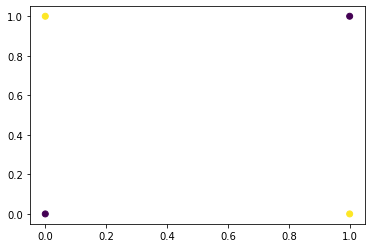

In [5]:
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import models

In [7]:
model = models.Sequential()
model.add(layers.Dense(2, input_dim=2))
model.add(layers.Activation('tanh'))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

In [8]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


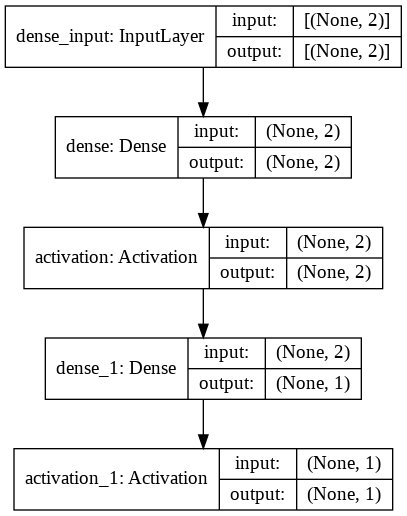

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_xor.png', show_shapes=True)

In [11]:
history = model.fit(x_data, y_data,  batch_size=1, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.4667
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.9000
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.8333
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.8145 - accuracy: 0.3667
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.8333
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7101 - accuracy: 0.7333
Epoch 7/500
4/4 [==============================] - 0s 1ms/step - loss: 0.8038 - accuracy: 0.5333
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.5333
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7090 - accuracy: 0.7333
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.9000
Epoch 11/500
4/4 [===========

**학습 결과 그려보기**

Text(0.5, 0, 'epoch')

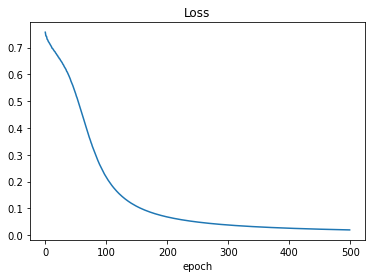

In [12]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

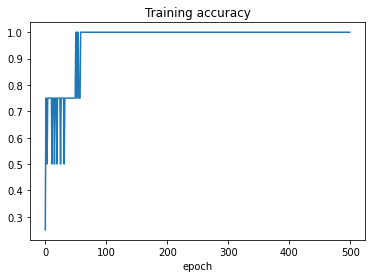

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('epoch')

**확률 찍어보기**

In [14]:
hypothesis = model.predict(x_data)
print(hypothesis)

[[0.01486158]
 [0.9746947 ]
 [0.9748669 ]
 [0.01247516]]


In [15]:
predicted = hypothesis > 0.5
print(predicted)

[[False]
 [ True]
 [ True]
 [False]]
